In [1]:
import pandas as pd

url = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
dados = pd.read_csv(url)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [7]:
# 1 - Realizar a média da metragem para cada um dos bairros. 
media_por_bairro = dados.groupby('Bairro')['Metragem'].mean()
media_por_bairro

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

In [15]:
# 2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas).

dados_bairro_especifico1 = dados.loc[dados['Bairro'] == 'Vila Mariana']
dados_bairro_especifico1



,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [16]:
# 2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas).

dados_bairro_especifico2 = dados.query('Bairro == "Alto de Pinheiros"')
dados_bairro_especifico2

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
83,"Rua Carlos Rath, 103",Alto de Pinheiros,São Paulo,400,5,4,4,R$ 2.900.000
84,NaN,Alto de Pinheiros,São Paulo,358,4,4,4,R$ 3.500.000
137,"Rua Aquiramun, 94",Alto de Pinheiros,São Paulo,450,5,6,5,R$ 5.500.000
214,"Rua Açaré, 63",Alto de Pinheiros,São Paulo,252,3,5,4,R$ 2.900.000
226,Rua Banibás,Alto de Pinheiros,São Paulo,297,4,5,4,R$ 15.500\n /Mês
...,...,...,...,...,...,...,...,...
9691,NaN,Alto de Pinheiros,São Paulo,466,7,6,7,R$ 2.650.000
9696,Rua Sebastião Rodrigues,Alto de Pinheiros,São Paulo,150,3,2,2,R$ 2.150.000
9727,NaN,Alto de Pinheiros,São Paulo,466,7,6,7,R$ 2.650.000
9732,Rua Sebastião Rodrigues,Alto de Pinheiros,São Paulo,150,3,2,2,R$ 2.150.000


<Axes: xlabel='Bairro'>

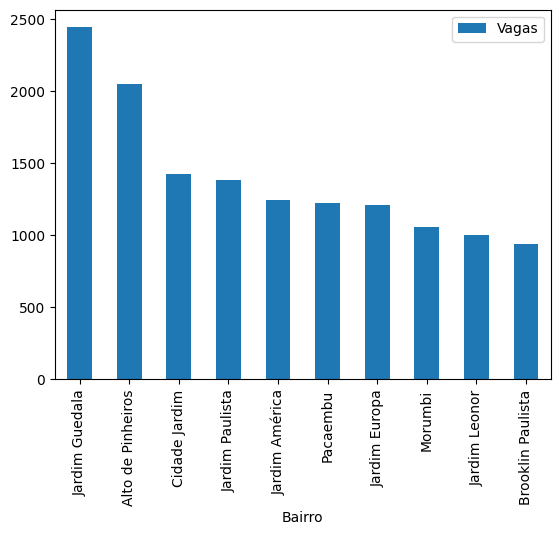

In [31]:
# 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF,
#  assim como tentar colocar alguma conclusão.
n_vagas_bairro = dados.groupby('Bairro')['Vagas'].sum().reset_index()

dados_ordenados = n_vagas_bairro.sort_values(by='Vagas', ascending=False)
top10_n_vagas_bairro = dados_ordenados.head(10)
top10_n_vagas_bairro.plot(x='Bairro', y='Vagas', kind='bar')
# A soma do numero de Vagas mostrado por bairro demonstra uma tendência dos moradores possuirem carro, 
# o que induz concluir que se tratam moradores com poder aquisitivo maior. Uma pesquisa mais aprofundada
# seria analisar a média de vagas por imóvel em cada bairro, o que poderia concluir que cada moradia possui ou não
# mais de um veículo na garagem.

C:\Users\ls_fo\AppData\Local\Temp\ipykernel_13648\752745884.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  media_vagas_bairro.ordenados = media_vagas_bairro.sort_values(by='Vagas', ascending=False)


<Axes: xlabel='Bairro'>

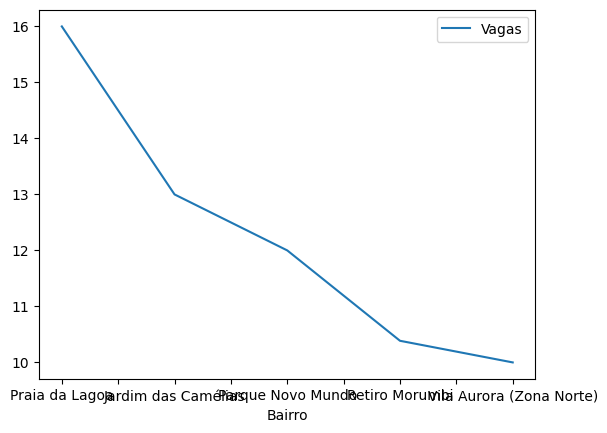

In [51]:
# 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF,
#  assim como tentar colocar alguma conclusão.
media_vagas_bairro = dados.groupby('Bairro')['Vagas'].mean().reset_index()
media_vagas_bairro.ordenados = media_vagas_bairro.sort_values(by='Vagas', ascending=False)
media_vagas_bairro.ordenados.head(5).plot(x='Bairro', y='Vagas', kind='line')
# O gráfico abaixo mostra que os 5 bairros com maior média de vagas possuem mais de 10 vagas por garagem.
# Estes dados são insuficientes para tirar grandes conclusões já que parecem se tratar de valores dispersos